In [2]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=4, shots = 1)

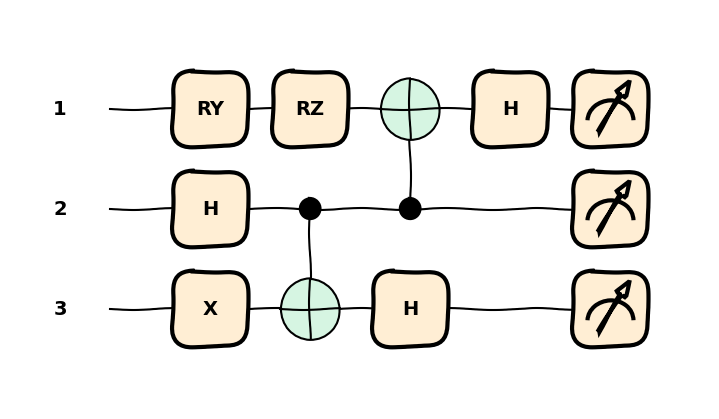

In [27]:
@qml.qnode(dev)
def qfunc(theta = 0, phi = 0, boxC = False):
    
    # Preparation stage
    
    # Signal qubit
    
    if not boxC:
        qml.RY(theta, wires=1)
        qml.RZ(phi, wires=1)
    elif boxC == "Phi+":
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
    elif boxC == "Phi-":
        qml.PauliX(wires=0)
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
    elif boxC == "Psi+":
        qml.PauliX(wires=1)
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
    elif boxC == "Psi-":
        qml.PauliX(wires=0)
        qml.PauliX(wires=1)
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
    
    # Ancilla pair
    #qml.PauliX(2)
    qml.PauliX(3)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[2, 3])
    
    # =========================
    # Information distillation
    # =========================
    
    #qml.S(1)
    qml.CNOT([2,1])
    qml.Hadamard(1)
    qml.Hadamard(3)
    #qml.Hadamard(3)
    
    return qml.counts(wires=[1,2,3])

tqfunc = qml.defer_measurements(qfunc)
circuit = qml.QNode(qfunc, dev)
qml.draw_mpl(circuit, style="sketch")()
plt.show()

In [28]:
circuit(0, 0, shots = 100)

{'000': 14,
 '001': 6,
 '010': 15,
 '011': 14,
 '100': 14,
 '101': 11,
 '110': 12,
 '111': 14}

In [29]:
circuit(np.pi,0., shots=100)

{'000': 13,
 '001': 7,
 '010': 9,
 '011': 19,
 '100': 9,
 '101': 16,
 '110': 16,
 '111': 11}

In [30]:
circuit(np.pi/2,np.pi/2, shots=100)

{'000': 9,
 '001': 10,
 '010': 13,
 '011': 15,
 '100': 12,
 '101': 12,
 '110': 20,
 '111': 9}

In [31]:
circuit(np.pi/2,-np.pi/2, shots=100)

{'000': 10,
 '001': 15,
 '010': 10,
 '011': 12,
 '100': 20,
 '101': 14,
 '110': 9,
 '111': 10}

In [32]:
circuit(boxC="Psi+", shots=200)

{'000': tensor(19, dtype=int64, requires_grad=True),
 '001': tensor(24, dtype=int64, requires_grad=True),
 '010': tensor(18, dtype=int64, requires_grad=True),
 '011': tensor(25, dtype=int64, requires_grad=True),
 '100': tensor(17, dtype=int64, requires_grad=True),
 '101': tensor(34, dtype=int64, requires_grad=True),
 '110': tensor(33, dtype=int64, requires_grad=True),
 '111': tensor(30, dtype=int64, requires_grad=True)}

# Defining Box parameters

In [967]:
n = 100 # (half) number of qubits in the box
N = 2*n

# Box A simulation

In [968]:
theta = np.zeros(N)
theta[:n] = 0.
theta[n:] = np.pi

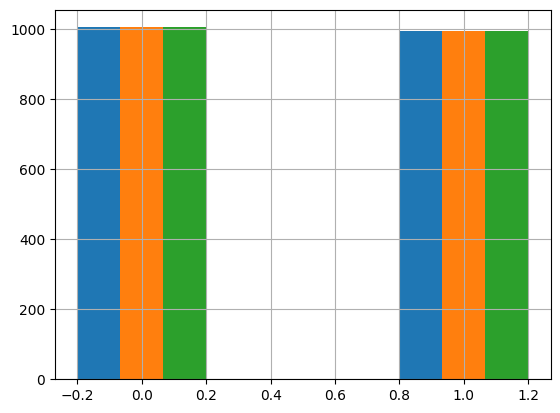

In [556]:
samplesA = np.array(circuit(theta, 0)) # sample all qubits in the z-axis
plt.hist(samplesA, bins=[-0.25,0.25,0.75,1.25])
plt.grid()
plt.show()

# Box B simulation

In [166]:
phi = np.zeros(N)
phi[:n] = 0.
phi[n:] = np.pi

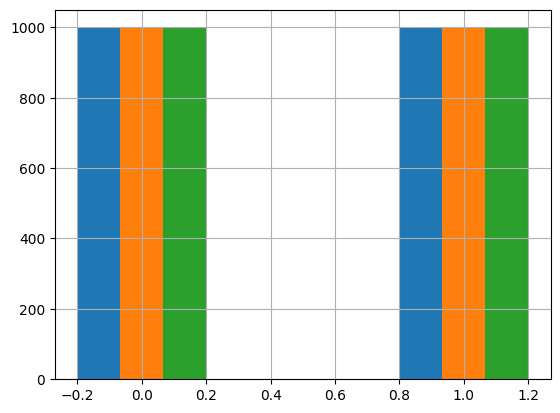

In [167]:
samplesB = np.array(circuit(np.pi/2, phi)) # sample all qubits in the z-axis
plt.hist(samplesB, bins=[-0.25,0.25,0.75,1.25])
plt.grid()
plt.show()

# Box C simulation

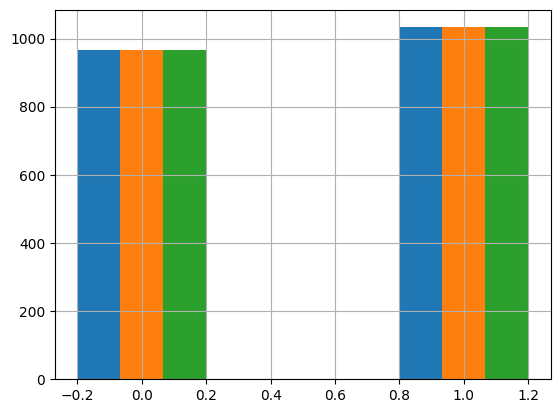

In [168]:
samplesC = np.array(circuit(boxC="Phi+", shots=N)) # sample all qubits in the z-axis
plt.hist(samplesC, bins=[-0.25,0.25,0.75,1.25])
plt.grid()
plt.show()

# Conditioned photon numbers

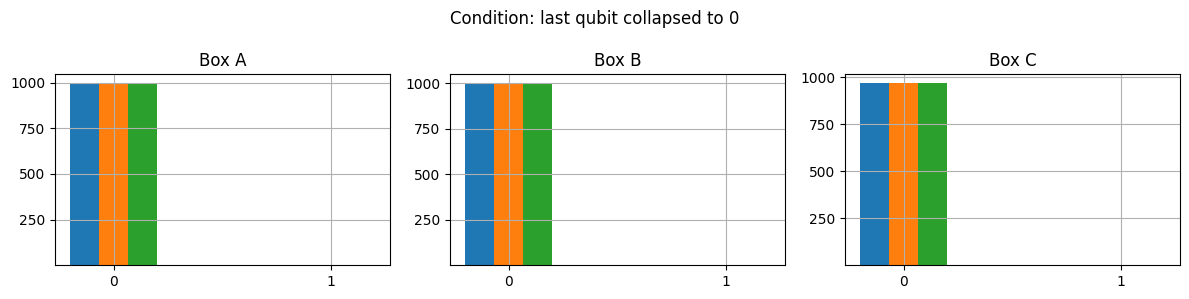

In [169]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: last qubit collapsed to 0")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,2] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,2] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,2] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()
plt.show()

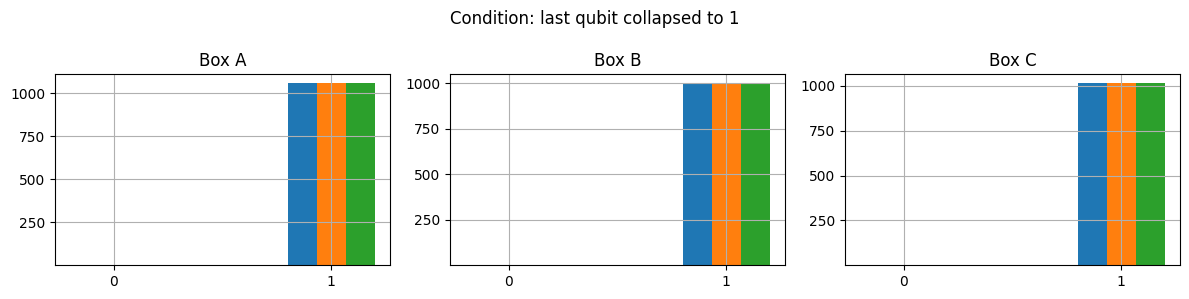

In [143]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: last qubit collapsed to 1")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,2] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,2] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,2] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()
plt.show()

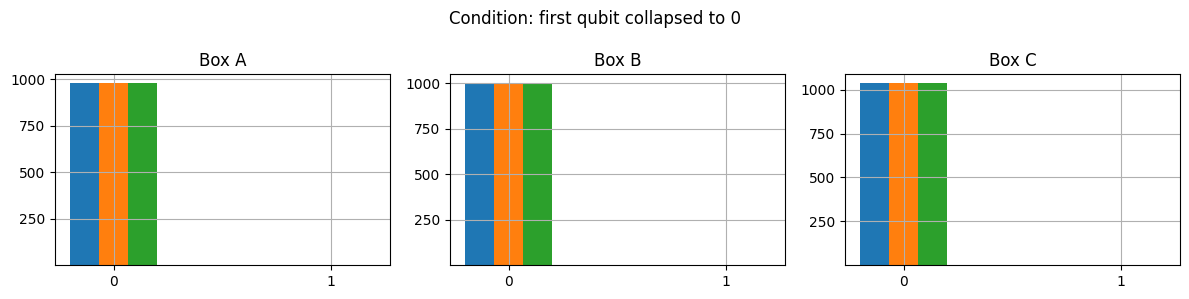

In [73]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: first qubit collapsed to 0")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,0] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,0] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,0] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()

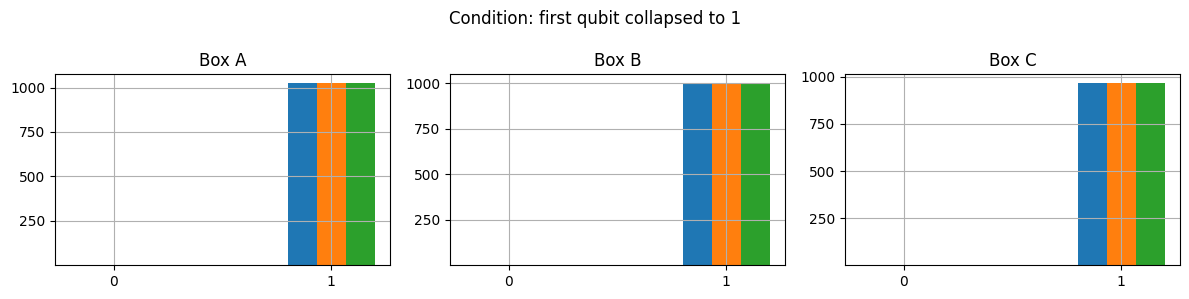

In [74]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: first qubit collapsed to 1")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,0] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,0] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,0] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()

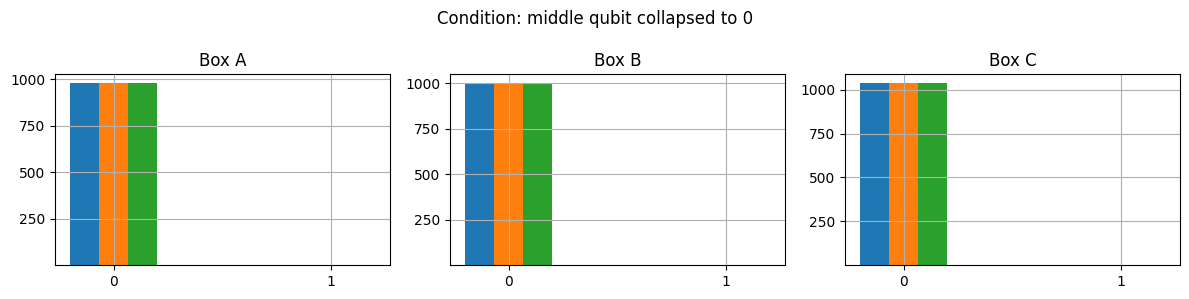

In [77]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: middle qubit collapsed to 0")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,1] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,1] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,1] == 0], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()

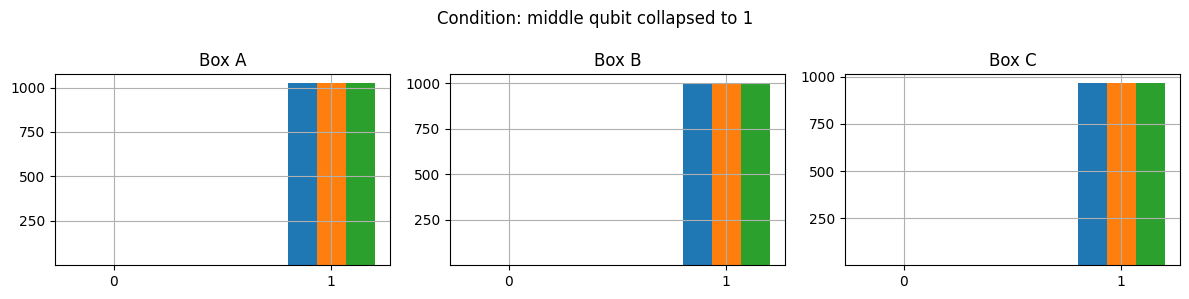

In [78]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=True)
plt.suptitle("Condition: middle qubit collapsed to 1")
ax[0].set_title("Box A")
ax[0].hist(samplesA[samplesA[:,1] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[0].set_xticks([0,1])
ax[0].set_yticks([250,500,750,1000])
ax[0].grid()
ax[1].set_title("Box B")
ax[1].hist(samplesB[samplesB[:,1] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[1].set_xticks([0,1])
ax[1].set_yticks([250,500,750,1000])
ax[1].grid()
ax[2].set_title("Box C")
ax[2].hist(samplesC[samplesC[:,1] == 1], bins=[-0.25,0.25,0.75,1.25])
ax[2].set_xticks([0,1])
ax[2].set_yticks([250,500,750,1000])
ax[2].grid()

# Other stuff

In [64]:
print("Check numbers conditioned on last qubit result")
print()
print("="*80)
print("Measurement results given last qubit collapsed to 0")
print("="*80)
print("\t"*4,"  A\t   B \t   C")
print("First qubit collapsed to 0:\t",
    (samplesA[samplesA[:,2] == 0][:,0] == 0).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0] == 0).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0] == 0).all())

print("First qubit collapsed to 1:\t",
    (samplesA[samplesA[:,2] == 0][:,0] == 1).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0] == 1).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0] == 1).all())

print("Middle qubit collapsed to 0:\t",
    (samplesA[samplesA[:,2] == 0][:,1] == 0).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,1] == 0).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,1] == 0).all())

print("Middle qubit collapsed to 1:\t",
    (samplesA[samplesA[:,2] == 0][:,1] == 1).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,1] == 1).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,1] == 1).all())

print("Both qubits collapsed to 00:\t",
    (samplesA[samplesA[:,2] == 0][:,0:2] == [0,0]).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0:2] == [0,0]).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0:2] == [0,0]).all())

print("Both qubits collapsed to 01:\t",
    (samplesA[samplesA[:,2] == 0][:,0:2] == [0,1]).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0:2] == [0,1]).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0:2] == [0,1]).all())

print("Both qubits collapsed to 10:\t",
    (samplesA[samplesA[:,2] == 0][:,0:2] == [1,0]).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0:2] == [1,0]).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0:2] == [1,0]).all())

print("Both qubits collapsed to 11:\t",
    (samplesA[samplesA[:,2] == 0][:,0:2] == [1,1]).all(), "\t",
    (samplesB[samplesB[:,2] == 0][:,0:2] == [1,1]).all(), "\t",
    (samplesC[samplesC[:,2] == 0][:,0:2] == [1,1]).all())

print("="*80)
print("Measurement results given last qubit collapsed to 1")
print("="*80)
print("\t"*4,"  A\t   B \t   C")
print("First qubit collapsed to 0:\t",
    (samplesA[samplesA[:,2] == 1][:,0] == 0).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0] == 0).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0] == 0).all())

print("First qubit collapsed to 1:\t",
    (samplesA[samplesA[:,2] == 1][:,0] == 1).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0] == 1).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0] == 1).all())

print("Middle qubit collapsed to 0:\t",
    (samplesA[samplesA[:,2] == 1][:,1] == 0).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,1] == 0).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,1] == 0).all())

print("Middle qubit collapsed to 1:\t",
    (samplesA[samplesA[:,2] == 1][:,1] == 1).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,1] == 1).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,1] == 1).all())

print("Both qubits collapsed to 00:\t",
    (samplesA[samplesA[:,2] == 1][:,0:2] == [0,0]).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0:2] == [0,0]).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0:2] == [0,0]).all())

print("Both qubits collapsed to 01:\t",
    (samplesA[samplesA[:,2] == 1][:,0:2] == [0,1]).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0:2] == [0,1]).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0:2] == [0,1]).all())

print("Both qubits collapsed to 10:\t",
    (samplesA[samplesA[:,2] == 1][:,0:2] == [1,0]).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0:2] == [1,0]).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0:2] == [1,0]).all())

print("Both qubits collapsed to 11:\t",
    (samplesA[samplesA[:,2] == 1][:,0:2] == [1,1]).all(), "\t",
    (samplesB[samplesB[:,2] == 1][:,0:2] == [1,1]).all(), "\t",
    (samplesC[samplesC[:,2] == 1][:,0:2] == [1,1]).all())

Check numbers conditioned on last qubit result

Measurement results given last qubit collapsed to 0
				   A	   B 	   C
First qubit collapsed to 0:	 False 	 False 	 False
First qubit collapsed to 1:	 False 	 False 	 False
Middle qubit collapsed to 0:	 False 	 False 	 False
Middle qubit collapsed to 1:	 False 	 False 	 False
Both qubits collapsed to 00:	 False 	 False 	 False
Both qubits collapsed to 01:	 False 	 False 	 False
Both qubits collapsed to 10:	 False 	 False 	 False
Both qubits collapsed to 11:	 False 	 False 	 False
Measurement results given last qubit collapsed to 1
				   A	   B 	   C
First qubit collapsed to 0:	 False 	 False 	 False
First qubit collapsed to 1:	 False 	 False 	 False
Middle qubit collapsed to 0:	 False 	 False 	 False
Middle qubit collapsed to 1:	 False 	 False 	 False
Both qubits collapsed to 00:	 False 	 False 	 False
Both qubits collapsed to 01:	 False 	 False 	 False
Both qubits collapsed to 10:	 False 	 False 	 False
Both qubits collapsed to 11:	 Fa

In [65]:
print("Check numbers conditioned on first qubit result")
print()
print("="*80)
print("Measurement results given first qubit collapsed to 0")
print("="*80)
print("\t"*4,"  A\t   B \t   C")
print("Middle qubit collapsed to 0:\t",
    (samplesA[samplesA[:,0] == 0][:,1] == 0).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1] == 0).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1] == 0).all())

print("Middle qubit collapsed to 1:\t",
    (samplesA[samplesA[:,0] == 0][:,1] == 1).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1] == 1).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1] == 1).all())

print("Last qubit collapsed to 0:\t",
    (samplesA[samplesA[:,0] == 0][:,2] == 0).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,2] == 0).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,2] == 0).all())

print("Last qubit collapsed to 1:\t",
    (samplesA[samplesA[:,0] == 0][:,2] == 1).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,2] == 1).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,2] == 1).all())

print("Both qubits collapsed to 00:\t",
    (samplesA[samplesA[:,0] == 0][:,1:3] == [0,0]).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1:3] == [0,0]).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1:3] == [0,0]).all())

print("Both qubits collapsed to 01:\t",
    (samplesA[samplesA[:,0] == 0][:,1:3] == [0,1]).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1:3] == [0,1]).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1:3] == [0,1]).all())

print("Both qubits collapsed to 10:\t",
    (samplesA[samplesA[:,0] == 0][:,1:3] == [1,0]).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1:3] == [1,0]).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1:3] == [1,0]).all())

print("Both qubits collapsed to 11:\t",
    (samplesA[samplesA[:,0] == 0][:,1:3] == [1,1]).all(), "\t",
    (samplesB[samplesB[:,0] == 0][:,1:3] == [1,1]).all(), "\t",
    (samplesC[samplesC[:,0] == 0][:,1:3] == [1,1]).all())

print("="*80)
print("Measurement results given first qubit collapsed to 1")
print("="*80)
print("\t"*4,"  A\t   B \t   C")
print("Middle qubit collapsed to 0:\t",
    (samplesA[samplesA[:,0] == 1][:,1] == 0).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1] == 0).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1] == 0).all())

print("Middle qubit collapsed to 1:\t",
    (samplesA[samplesA[:,0] == 1][:,1] == 1).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1] == 1).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1] == 1).all())

print("Last qubit collapsed to 0:\t",
    (samplesA[samplesA[:,0] == 1][:,2] == 0).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,2] == 0).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,2] == 0).all())

print("Last qubit collapsed to 1:\t",
    (samplesA[samplesA[:,0] == 1][:,2] == 1).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,2] == 1).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,2] == 1).all())

print("Both qubits collapsed to 00:\t",
    (samplesA[samplesA[:,0] == 1][:,1:3] == [0,0]).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1:3] == [0,0]).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1:3] == [0,0]).all())

print("Both qubits collapsed to 01:\t",
    (samplesA[samplesA[:,0] == 1][:,1:3] == [0,1]).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1:3] == [0,1]).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1:3] == [0,1]).all())

print("Both qubits collapsed to 10:\t",
    (samplesA[samplesA[:,0] == 1][:,1:3] == [1,0]).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1:3] == [1,0]).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1:3] == [1,0]).all())

print("Both qubits collapsed to 11:\t",
    (samplesA[samplesA[:,0] == 1][:,1:3] == [1,1]).all(), "\t",
    (samplesB[samplesB[:,0] == 1][:,1:3] == [1,1]).all(), "\t",
    (samplesC[samplesC[:,0] == 1][:,1:3] == [1,1]).all())

Check numbers conditioned on first qubit result

Measurement results given first qubit collapsed to 0
				   A	   B 	   C
Middle qubit collapsed to 0:	 False 	 False 	 False
Middle qubit collapsed to 1:	 False 	 False 	 False
Last qubit collapsed to 0:	 False 	 False 	 False
Last qubit collapsed to 1:	 False 	 False 	 False
Both qubits collapsed to 00:	 False 	 False 	 False
Both qubits collapsed to 01:	 False 	 False 	 False
Both qubits collapsed to 10:	 False 	 False 	 False
Both qubits collapsed to 11:	 False 	 False 	 False
Measurement results given first qubit collapsed to 1
				   A	   B 	   C
Middle qubit collapsed to 0:	 False 	 False 	 False
Middle qubit collapsed to 1:	 False 	 False 	 False
Last qubit collapsed to 0:	 False 	 False 	 False
Last qubit collapsed to 1:	 False 	 False 	 False
Both qubits collapsed to 00:	 False 	 False 	 False
Both qubits collapsed to 01:	 False 	 False 	 False
Both qubits collapsed to 10:	 False 	 False 	 False
Both qubits collapsed to 11:	 Fal